<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp

In [11]:
t=np.array([1.00,1.01,1.02,1.03,1.04])
i=np.array([3.10,3.12,3.14,3.18,3.24])
L= 0.98
R= 0.142

In [7]:
df= pd.DataFrame({"Tiempo": t,"Corriente":i})
df

,Tiempo,Corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


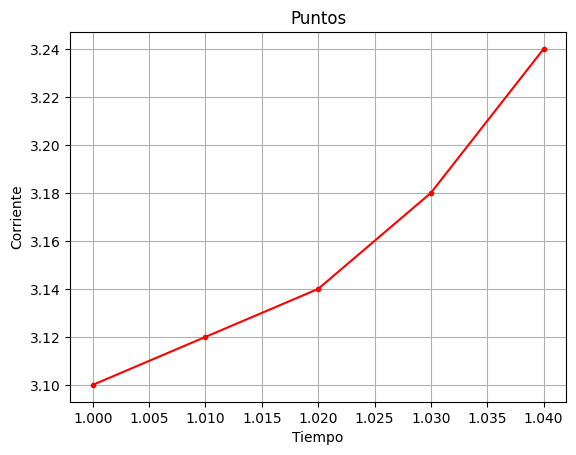

In [24]:
plt.plot(t,i,".r-")
plt.title("Puntos")
plt.ylabel('Corriente')
plt.xlabel('Tiempo')
plt.grid()

In [14]:
#pendiente
m = np.diff(i)/np.diff(t)

In [20]:
prom_i = (i[0:4] + i[1:])/2
prom_t = (t[0:4] + t[1:])/2

In [16]:
#fem
fem= L * m + R * prom_i
fem

array([2.40162, 2.40446, 4.36872, 6.33582])

In [17]:
df1=pd.DataFrame({'Tiempo':prom_t,'Corriente':prom_i, 'Derivada': m, 'Fem':fem})
df1

,Tiempo,Corriente,Derivada,Fem
0,1.005,3.11,2.0,2.40162
1,1.015,3.13,2.0,2.40446
2,1.025,3.16,4.0,4.36872
3,1.035,3.21,6.0,6.33582


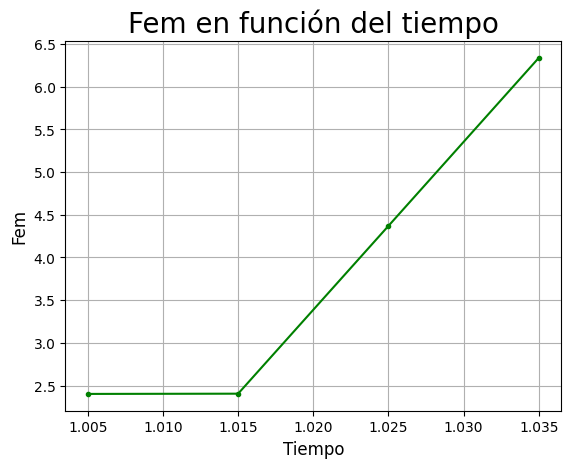

In [22]:
plt.plot(prom_t,fem,'.g-')
plt.ylabel('Fem', fontsize=12)
plt.xlabel('Tiempo', fontsize=12)
plt.grid()




# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

## 1) Regla del trapecio
* Ingresar la función f para la cual, se desea integrar.
* Ingresar los intervalos de integración a y b. Y la n cantidad de puntos que
tendrá la variable independiente.
* Crear un vector x que inicie en a, finalice en b y tenga n puntos.
* Utilizando la definición de la integral por trapecios:

$$\int_a^b f(x) \, dx \approx \frac{b - a}{2n} \left[ f(a) + 2f(a + h) + 2f(a + 2h) + \ldots + 2f(a + (n-1)h) + f(b) \right]$$

* Repetir para i en x:
$$ c = c + f(i) $$

* el valor de la integral (I) es:
$$ I = \frac{a-b}{2}(f(a) + f(b) + c) $$

## Regla de Simpson
La fórmula para calcular una integral utilizando la regla de Simpson es la siguiente:

$$ \int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(a) + 4f(a + h) + 2f(a + 2h) + \ldots + 2f(a + (n-2)h) + 4f(a + (n-1)h) + f(b) \right]$$

Donde:
- \(a\) y \(b\) son los límites de integración.
- \(n\) es el número de subintervalos pares.
- \(h\) es la longitud de cada subintervalo y se calcula como $$h = \frac{b - a}{n}$$
- f(x) es la función que se está integrando.


 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$


In [35]:
#Solición de la integral
x = sp.Symbol('x')
f = 1/(sp.tan(x))**(1/2)
I = sp.integrate(f, (x , 0, sp.pi/2)).evalf()
I

2.22144146907918

In [36]:
#función
def f(x):
    return 1/np.sqrt(np.tan(x))

In [43]:
a, b = 0.01, np.pi/2   #Límites
n = 1000  # Número de subintervalos

h = (b - a) / n
x = np.linspace(a, b, n+1)

trap_int = 0
for i in range(1, n):
    trap_int += ((f(x[i-1]) + f(x[i])) * h / 2)

print("Aproximación de la integral:", trap_int)

Aproximación de la integral: 2.0214998413457868


In [44]:
#Simpson
simp_int = h/3 * (f(x[0]) + 4*np.sum(f(x[1:n:2])) + 2*np.sum(f(x[2:n:2])) + f(x[n]))
print("Aproximación de la integral:", simp_int)

Aproximación de la integral: 2.0214377219170996


$$\int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx = \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \  \, dΘ $$  

In [45]:
#Solición de la integral
x = sp.Symbol('x')
f = 1/(1+x**2)
I = sp.integrate(f, (x , -sp.oo, sp.oo)).evalf()
I

3.14159265358979

In [51]:
#función
def f(x):
    return 1 * x**0

In [52]:
a, b = -np.pi/2, np.pi/2   #Límites
n = 1000  # Número de subintervalos

h = (b - a) / n
x = np.linspace(a, b, n+1)

trap_int = 0
for i in range(1, n):
    trap_int += ((f(x[i-1]) + f(x[i])) * h / 2)

print("Aproximación de la integral:", trap_int)

Aproximación de la integral: 3.138451060936147


In [53]:
#Simpson
simp_int = h/3 * (f(x[0]) + 4*np.sum(f(x[1:n:2])) + 2*np.sum(f(x[2:n:2])) + f(x[n]))
print("Aproximación de la integral:", simp_int)

Aproximación de la integral: 3.1415926535897936


$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

In [62]:
#limites
x = np.linspace(0, np.pi/4, 1000)
y = np.linspace(np.sin(x), np.cos(x))

In [63]:
#función
def f1(x,y):
  return 2*y*np.sin(x) + np.cos(x)**2

In [ ]:
sp.inte

In [ ]:
I = np.zeros(len(x))

for i , x_ in enumerate(x):
  y_ = np.linspace(np.sin(x_), np.cos(x_))
  I[i] = sc.integrate.trapezoid(f1(x_,y_), y_)
I

In [68]:
sc.integrate.trapezoid(I,x)

0.5118445260477336

5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [69]:
#parametros
b = 0.5
g= 9.8 #gravedad
I_0 = 83.33e-6 #momento de inercia
m = 0.1

P_0 = 2*np.pi*np.sqrt((I_0/(m*g*b)))

In [70]:
theta = np.linspace(0.01,np.pi/2,100)

In [71]:
def periodo_T(theta, rho):
  k = np.sin(theta/2)

  T_1 = (2 * P_0)/np.pi

  T_func= P_1*(1/(np.sqrt(1-(k**2)*(np.sin(rho))**2)))

  return T_func

In [ ]:
rho = np.linspace(0,np.pi/2,10000)

I_trap = np.zeros(len(theta))
for i,n_ in enumerate(theta):
  a = sc.integrate.trapezoid(periodo_T(n_,rho), rho)
  I_trap[i] = a
